In [161]:
# Loading all the libraries

import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

from scipy import stats as st



In [162]:
# Load the data files into a DataFrame

car_advertisement_df = pd.read_csv('vehicles_us.csv')

# Overview of Project
-
-
-


# Steps to review data
1. .info()
2. .describe()
3. .sample()
4. list(df.columns)
5. 


In [163]:
# Print a sample of data to understand data set
car_advertisement_df.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
38944,4200,2004.0,chevrolet tahoe,good,8.0,gas,203000.0,automatic,SUV,white,NaN,2018-10-07,30
2925,19995,2011.0,ford f-150,excellent,6.0,gas,127664.0,automatic,pickup,silver,1.0,2019-04-08,62
11293,24300,2013.0,toyota tacoma,excellent,6.0,gas,68358.0,automatic,truck,white,1.0,2018-06-04,46
34634,3600,2000.0,gmc sierra 1500,good,8.0,gas,277000.0,automatic,truck,black,1.0,2018-07-13,71
21024,13595,2017.0,volkswagen jetta,excellent,4.0,gas,33775.0,automatic,sedan,red,NaN,2018-11-15,28
10596,24980,2016.0,gmc sierra 1500,excellent,8.0,gas,30000.0,automatic,truck,silver,1.0,2019-04-11,16
30111,12995,NaN,nissan frontier crew cab sv,good,6.0,gas,102988.0,automatic,truck,white,NaN,2018-11-29,7
14698,4800,2009.0,toyota camry,good,4.0,gas,153000.0,automatic,sedan,grey,NaN,2018-08-21,136
5122,29500,2017.0,chevrolet silverado 1500,excellent,8.0,gas,15221.0,automatic,pickup,red,1.0,2019-03-25,16
16663,12000,2013.0,chevrolet suburban,excellent,NaN,gas,179000.0,automatic,SUV,blue,1.0,2019-03-10,95


In [164]:
# Calculate count of missing values
car_advertisement_df.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [165]:
# Print unique / nunique entries for each column to (1) identify missed spellings, (2) identify null values
car_advertisement_df['condition'].unique()

car_advertisement_df['fuel'].unique()

car_advertisement_df['is_4wd'].nunique()

#car_advertisement_df['new_is_4wd'].unique()

unique_car_model = car_advertisement_df['model'].unique()

car_advertisement_df['transmission'].unique()

car_advertisement_df['type'].unique()

car_advertisement_df['paint_color'].unique()



array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [166]:
# counting obvious duplicates
car_advertisement_df.duplicated().sum()

0

In [167]:
car_advertisement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [168]:
car_advertisement_df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


# Steps to data preprocessing
1. Column titles (upper case, spaces, obvious descriptions)
2. Identify and remove duplicates
3. Find and address missing values
4. Ensure data types are fitting
    - Dates = datetime
    - change floats & objects to integers when it makes sense
5. Fix null values 
6. Print unique entries for each column to (1) identify missed spellings, (2) identify null values, (3) duplicated values b/c of spelling
7. Change upper case to lower case
8. Identify oppportunities to enhance the data





# List of problems to clean up
1. Fix data types: - DONE
    - Change model_year from float to int
    - Change date_posted from object to datetype
    - Change cylinders from object to int
    - Change odometer from from float to int
2. Fix missing values: DONE
    - model_year
    - cylinders
    - odometer
    - paint_color
    - is_4wd
3. Search for duplicates and remove - DONE (0 obvious duplicates)
4. Replace null values with zeros - DONE --> NEED TO FIX THIS to (EXCEPT IF UNK)
    - is_4wd --> change nulls to 0's 
5. Change 1.0 to 'yes' in is_4wd and NaN to 'no' - DONE
5. Fix duplicates / spellings under model: DONE
    - F-250 SD to Ford F-250 Super Duty
    - Ford F150 --> Ford f-150
    - ford f250 --> ford f-250
    - ford f-350 sd --? ford f-150 Super Duty
    - ford f250 super duty --> Ford F-250 Super Duty
    - ford f150 supercrew cab xlt --> ford f-150 supercrew cab xlt
    - ford f350 --? ford f-350
    - ford f350 super duty --> ford f-350 super duty
6. Change model column to all lowercase - DONE

    

In [169]:
# Fix data types
# Change model_year from float to int
car_advertisement_df['model_year'] = car_advertisement_df['model_year'].astype('Int64') 
# add errors='ignore' so it ignores null values and replacing null values with NAN

# Change date_posted from object to datetype
car_advertisement_df['date_posted'] = pd.to_datetime(car_advertisement_df['date_posted'],errors='coerce')
# errors='coerce' --> use this so it doesn't throw an error if some values are null; b/c it will not convert null values to a datetime (those would be an error)

# Change cylinders from float to int
car_advertisement_df['cylinders'] = car_advertisement_df['cylinders'].astype('Int64')

# Change odometer from from float to int
car_advertisement_df['odometer'] = car_advertisement_df['odometer'].astype('Int64')
# Pass 'int64' which saves integers in the back end, which automatically igno






In [170]:
# Fix duplicates / spellings under model:
""" - F-250 SD to Ford F-250 Super Duty
    - Ford F150 --> Ford f-150 - DONE
    - ford f250 --> ford f-250 - DONE
    - ford f-350 sd --? ford f-150 Super Duty - DONE
    - ford f250 super duty --> Ford F-250 Super Duty - DONE
    - ford f150 supercrew cab xlt --> ford f-150 supercrew cab xlt - DONE
    - ford f350 --? ford f-350
    - ford f350 super duty --> ford f-350 super duty"""

#car_advertisement_df['model'] = np.where(car_advertisement_df['model']== 'ford f150', 'ford f-150', car_advertisement_df['model']) # np.where parameter ==(old value, new value, print other values as-is)

car_advertisement_df['model'] = np.where(car_advertisement_df['model']== 'ford f150', 'ford f-150',np.where(car_advertisement_df['model']== 'ford f250', 'ford f-250', np.where(car_advertisement_df['model']== 'ford f-350 sd', 'ford f-150 super duty', np.where(car_advertisement_df['model']== 'ford f250 super duty', 'ford f-250 super duty', np.where(car_advertisement_df['model']== 'ford f150 supercrew cab xlt', 'ford f-150 supercrew cab xlt', np.where(car_advertisement_df['model']== 'ford f350', 'ford f-350', np.where(car_advertisement_df['model']== 'ford f350 super duty', 'ford f-350 super duty', np.where(car_advertisement_df['model']== 'ford f-250 sd', 'ford f-250 super duty', car_advertisement_df['model']))))))))


#car_advertisement_df['model'] = car_advertisement_df['model'].str.lower()      # Change to lower case

In [171]:
car_advertisement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  Int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  Int64         
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  Int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: Int64(3), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 5.3+ MB


In [172]:
# Find and replace missing values with UNK (for objects)

# looping over column names and replacing missing values with 'unknown'
columns_to_replace = ['paint_color'] 
for r in columns_to_replace: 
    car_advertisement_df[r].fillna('unknown', inplace=True)

car_advertisement_df


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,<NA>,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,<NA>,automatic,pickup,unknown,NaN,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,NaN,2018-07-02,71


In [173]:
car_advertisement_df['model_year'] = car_advertisement_df.groupby('model')['model_year'].transform(lambda x: x.fillna(x.median())) 
car_advertisement_df['cylinders'] = car_advertisement_df.groupby('model')['cylinders'].transform(lambda x: x.fillna(x.median())) 
# Filling missing values for 'odometer' based on median values grouped by 'model' and 'model_year'
car_advertisement_df['odometer'] = car_advertisement_df.groupby(['model', 'model_year'])['odometer'].transform(lambda x: x.fillna(x.median()))
# Filling any remaining missing values in the specified columns with 0
columns_to_replace = ['is_4wd']
for r in columns_to_replace:
   car_advertisement_df[r].fillna(0, inplace=True)

car_advertisement_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1.0,2018-06-23,19
1,25500,0,ford f-150,good,6,gas,88705,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,0,automatic,pickup,unknown,0.0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,like new,6,gas,88136,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002,honda civic,salvage,4,gas,181500,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009,hyundai sonata,excellent,4,gas,128000,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013,toyota corolla,good,4,gas,139573,automatic,sedan,black,0.0,2018-07-02,71


In [174]:
car_advertisement_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  Int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  Int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  Int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: Int64(3), datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 5.3+ MB


# List of data enrichments
1. Create additional column for is_4wd to express yes or no (instead of 1.0 and NaN)
2. Create additional column for car model to pull out just the names of the car manufacturers
3. 

In [175]:
# Enrishing our DataFrame by creating a new column with yes and no 
# Change 1.0 to 'yes' and NaN to 'no' in is_4wd
car_advertisement_df['1_new_is_4wd']=['yes' if x==1 else 'no' if x is not None else 'no' for x in  car_advertisement_df['is_4wd']]



# EDA / visual ideas
1. Which manufacturers have the highest priced vehicles?
2. Which car models come in red vs other colors?
3. What are the top 10 highest priced cars?
4. Which types of vehicles are 4wd?
5. Are automatics priced higher than manual and other?
6. Which is a bigger driver of car price, condition or cylinders?
7. How many cars are red, blue, all colors?

# EDA #1: Is there a relationship between the number of cylinders and price?

Approach:
1. Check data types - DONE
2. Groupby cylinders + price in a scatterplot



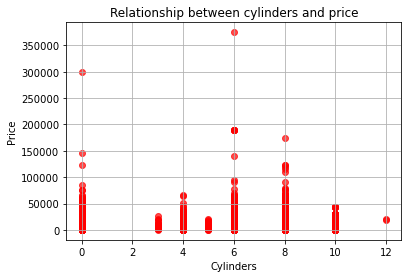

In [176]:
# Create scatterplot
# independent variable on x-axis

plt.scatter(car_advertisement_df['cylinders'], car_advertisement_df['price'], color='red', alpha=0.7)

# Add labels and title
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.title('Relationship between cylinders and price')
plt.grid(True)
plt.show()



# EDA #2: Is there a relationship between the odometer and price?

Approach:
1. Check data types - DONE
2. Groupby odometer + price in a scatterplot

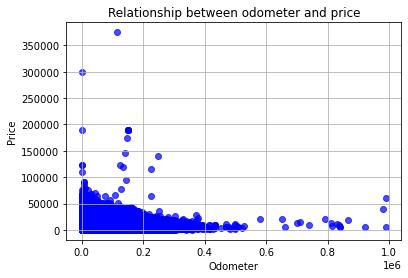

In [177]:
# Create scatterplot
# independent variable on x-axis

plt.scatter(car_advertisement_df['odometer'], car_advertisement_df['price'], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Relationship between odometer and price')
plt.grid(True)
plt.show()

# EDA #3: Show distribution of the price

Approach:
1. Check data types - DONE
2. Create histogram by price

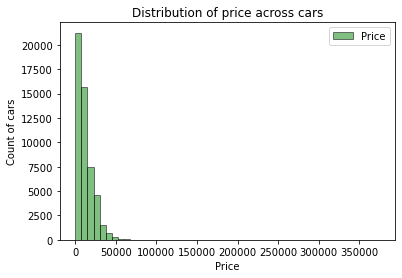

In [178]:
# Create histogram of price

# Create histogram
# independent variable on x-axis

plt.hist(car_advertisement_df['price'], bins=50, color='green', alpha=0.5, edgecolor='k', label='Price')

plt.legend()
plt.title('Distribution of price across cars')
plt.xlabel('Price') # This will always be the column sorted, ex 'duration_rounded'
plt.ylabel('Count of cars') 

plt.show()



# EDA #4: Show distribution of the model year

Approach:
1. Check data types - DONE
2. Create histogram by model year

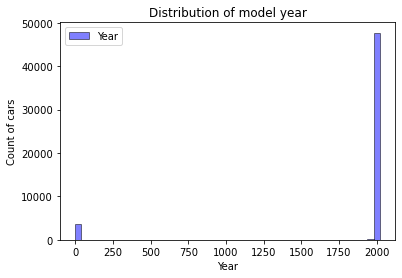

In [179]:
# Create histogram of model year
# Create histogram

# independent variable on x-axis

plt.hist(car_advertisement_df['model_year'], bins=50, color='blue', alpha=0.5, edgecolor='k', label='Year')

plt.legend()
plt.title('Distribution of model year')
plt.xlabel('Year') # This will always be the column sorted, ex 'duration_rounded'
plt.ylabel('Count of cars') 

plt.show()